In [1]:
import json
import pandas as pd
import os
import datetime
from tqdm import tqdm
import glob
import re

In [10]:
path = r'E:\Instagram\Typhoon_tapa\json\post_info'
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('UTC.json')]
os.chdir(path)

In [19]:
post_created_time = [] #The time when the post was created
is_ad = []# Is this post an ad?
post_owner = [] # Post owner user name
post_owner_id = []#post owner id number
is_video = [] # Is this post a video?
like_count =[] # like count of a post
caption = [] # Caption of the post
caption_hashtag = [] # Hash tags in each captions
caption_mention = [] #check if there is any mention
post_count = [] # set 1 for each account
num_comment = [] # Number of comments for each post


In [20]:
for cmts in tqdm(json_files):
    post_created_time.append(datetime.datetime.strptime(cmts[:-9],'%Y-%m-%d_%H-%M-%S'))
    with open(cmts,'r',encoding="utf-8") as f:
        data = json.load(f)
        try:
            is_ad.append(data['node']['is_ad'])
        except:
            is_ad.append('-')
        try:
            post_owner.append(data['node']['owner']['username'])
        except:
            pass
        post_owner_id.append(data['node']['owner']['id'])
        is_video.append(data['node']['is_video'])
        like_count.append(data['node']['edge_liked_by']['count'])
        try:
            caption.append(data['node']['edge_media_to_caption']['edges'][0]['node']['text'].replace('\n','\\n'))
        except:
            caption.append('-')
        post_count.append(1)
        num_comment.append(data['node']['edge_media_to_comment']['count'])

100%|███████████████████████████████████████████████████████████████████████████| 10786/10786 [00:18<00:00, 589.81it/s]


In [21]:
caption_hashtag = [re.findall(r"#[A-Za-z0-9_.\u3131-\u3163\uac00-\ud7a3]+", c) for c in caption]

In [22]:
caption_mention = [re.findall(r"@[A-Za-z0-9_.\u3131-\u3163\uac00-\ud7a3]+", c) for c in caption]

In [23]:
post_info = pd.DataFrame({    'Post_created_time':pd.Series(post_created_time),
                              'is_ad':pd.Series(is_ad),
                              'Post_Owner':pd.Series(post_owner),
                              'Post_Owner_id':pd.Series(post_owner_id),
                              'is_video':pd.Series(is_video),
                              'like_count':pd.Series(like_count),
                              'caption':pd.Series(caption),
                              'CaptionHashtag':pd.Series(caption_hashtag),
                              'CaptionMention':pd.Series(caption_mention),
                              'PostCount':pd.Series(post_count),
                              'NumComment':pd.Series(num_comment)
                                })

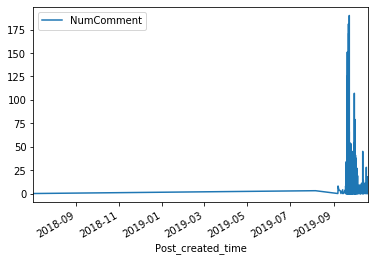

In [24]:
post_info =  post_info.sort_values('Post_created_time',ascending= True)
post_info.plot(x='Post_created_time',y = 'NumComment')

In [25]:
post_info = post_info[post_info['Post_created_time'] > '2019-09-01' ]

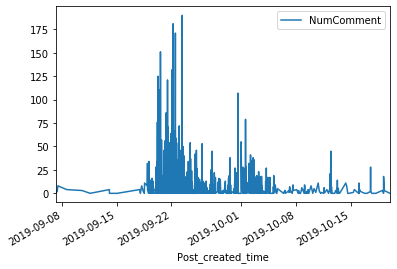

In [26]:
post_info =  post_info.sort_values('Post_created_time',ascending= True)
post_info.plot(x='Post_created_time',y = 'NumComment')

In [28]:
post_info.to_csv('태풍타파.csv',header=True, index = False)